**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import *
from keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt

**Load IMDB dataset of move reviews**

In [2]:
NUM_WORDS = 4096
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = NUM_WORDS)

17464789/17464789 [==============================] - 0s 0us/step


**Resotre original text**

In [3]:
word2id = imdb.get_word_index() # str: index
word2id = {k: (v + 3) for k, v in word2id.items()} # offset the indices
word2id['<PAD>'] = 0
word2id['<START>'] = 1
word2id['<UNKNOWN>'] = 2
word2id['<UNUSED>'] = 3
id2word = {v: k for k, v in word2id.items()} # index: str
string = ' '.join(id2word[id] for id in x_train[0])

print('preprocessed_data:', x_train[0])
print('original string:', string)
print('label:', 'postive' if y_train[0] else 'negative')

1641221/1641221 [==============================] - 0s 0us/step
preprocessed_data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
origi

**Pad the sequences to the same length**

In [4]:
x_train = sequence.pad_sequences(x_train, 256)
x_test = sequence.pad_sequences(x_test, 256)

**Build model**

In [5]:
model = Sequential([
    Embedding(NUM_WORDS, 32),
    # simpleRNN(32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          131072    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 139425 (544.63 KB)
Trainable params: 139425 (544.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compile and train model**

In [6]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 [==============================] - 37s 56ms/step - loss: 0.4404 - accuracy: 0.7896 - val_loss: 0.3068 - val_accuracy: 0.8720
Epoch 2/10
625/625 [==============================] - 33s 53ms/step - loss: 0.2822 - accuracy: 0.8864 - val_loss: 0.3155 - val_accuracy: 0.8640
Epoch 3/10
625/625 [==============================] - 33s 53ms/step - loss: 0.2479 - accuracy: 0.8989 - val_loss: 0.3152 - val_accuracy: 0.8694
Epoch 4/10
625/625 [==============================] - 32s 52ms/step - loss: 0.2137 - accuracy: 0.9170 - val_loss: 0.3206 - val_accuracy: 0.8710
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 0.1903 - accuracy: 0.9244 - val_loss: 0.3267 - val_accuracy: 0.8682
Epoch 6/10
625/625 [==============================] - 33s 53ms/step - loss: 0.1797 - accuracy: 0.9308 - val_loss: 0.3435 - val_accuracy: 0.8722
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.1433 - accuracy: 0.9469 - val_loss: 0.4036 - val_accuracy:

**Plot Accuracy**

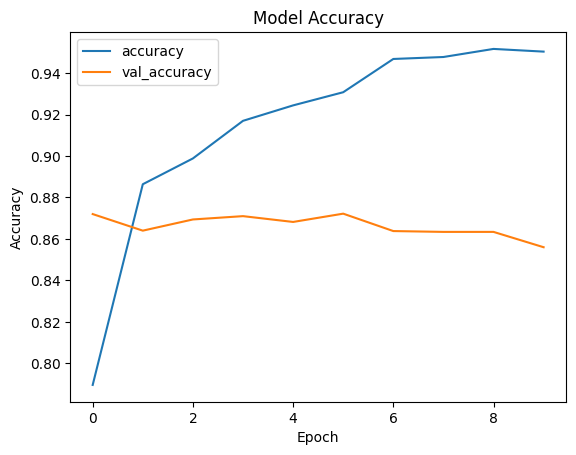

In [7]:
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

**Plot Loss**

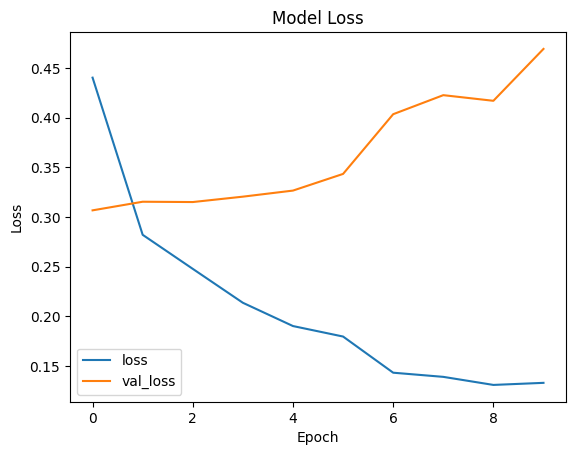

In [8]:
plt.title('Model Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.show()